<a href="https://colab.research.google.com/github/Kdavis2025/Automating-Compliance-AI-and-Machine-Learning-Approaches-to-Achieviing-CMMC-2.0-Certification/blob/main/Scoping_Assistant_and_Asset_Categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔍 Simulating port scan...
Simulated scanning of 10 hosts complete.
✅ 'simulated_scan_results.csv' has been created.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ 'simulated_labels.csv' has been created.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Merged scan and labels: 10 assets available for classification.
=== Compliance Classification Metrics ===
Total Assets Evaluated: 10
Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
Manual Classification Time (sec): 10.0
ML Classification Time (sec): 0.1
Estimated Time Saved (sec): 9.9

Detailed classification report:
                          precision    recall  f1-score   support

             CUI Assets       1.00      1.00      1.00         3
Contractor Risk Managed       1.00      1.00      1.00         2
               In-Scope       1.00      1.00      1.00         1
           Out-of-Scope       1.00      1.00      1.00         1
            Specialized       1.00      1.00      1.00         3

               accuracy                           1.00        10
              macro avg       1.00      1.00      1.00        10
           weighted avg       1.00      1.00      1.00        10

✅ 'classified_assets.csv' has been created.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

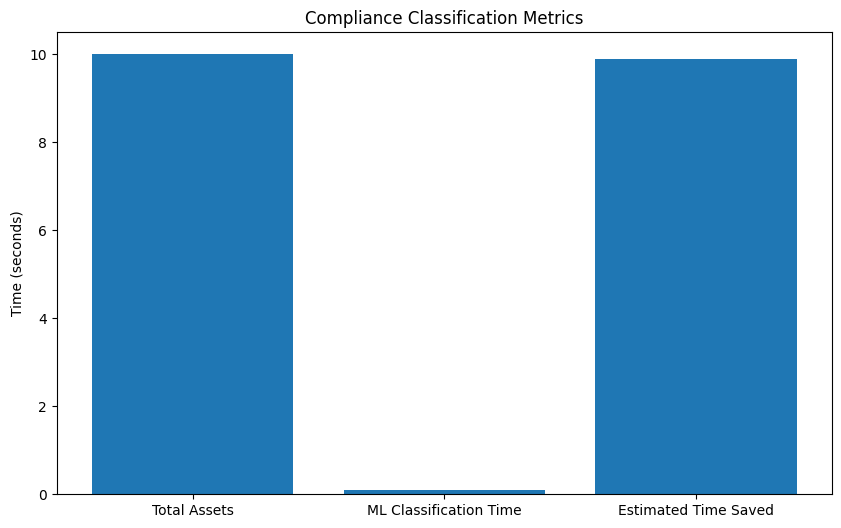

In [ ]:
# Simulated Scanner & Compliance Classifier

# Install dependencies
!pip install -q pandas scikit-learn

# Imports
import pandas as pd
import time
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from google.colab import files

# 1️⃣ Simulate network scanning
def simulate_scan_network(num_hosts: int = 10) -> pd.DataFrame:
    """
    Simulate port scanning by generating fake host data.
    Returns DataFrame with: ip, hostname, os, services, scan_time_sec.
    """
    ip_base = '192.168.1.'
    os_choices = ['Windows Server 2019', 'Ubuntu 20.04', 'CentOS 7', 'macOS 11.2', 'Unknown']
    service_catalog = ['22/ssh', '80/http', '443/https', '3389/rdp', '3306/mysql', '5432/postgres']
    records = []
    for i in range(1, num_hosts + 1):
        ip = ip_base + str(i * 10)
        hostname = f"host-{i:02d}"  # host-01, host-02, ...
        os_name = random.choice(os_choices)
        num_services = random.randint(1, 3)
        services = random.sample(service_catalog, num_services)
        # Simulate scan time between 0.5s and 2.0s per host
        scan_time = round(random.uniform(0.5, 2.0), 2)
        records.append({
            'ip': ip,
            'hostname': hostname,
            'os': os_name,
            'services': ' '.join(services),
            'scan_time_sec': scan_time
        })
        # Optional delay to mimic scanning process
        time.sleep(0.05)
    return pd.DataFrame(records)

# 2️⃣ Simulate ground-truth labels
def generate_simulated_labels(ip_list: list) -> pd.DataFrame:
    """
    Generate simulated CMMC categories for each IP in ip_list.
    """
    categories = ['In-Scope', 'Out-of-Scope', 'CUI Assets', 'Security Protection',
                  'Contractor Risk Managed', 'Specialized']
    records = []
    for ip in ip_list:
        category = random.choice(categories)
        records.append({'ip': ip, 'category': category})
    return pd.DataFrame(records)

# 3️⃣ Define classification & compliance metrics calculation
def classify_and_evaluate(df: pd.DataFrame, human_time_per_asset: float = 1.0):
    """
    Train Decision Tree on OS+services, evaluate classification and compute compliance metrics.
    Compare ML time vs. manual classification time.
    Assumes 'category' column exists (true labels).
    Returns DataFrame with predictions and metrics dict.
    """
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df['os'] + ' ' + df['services'])
    y_true = df['category']

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X, y_true)
    y_pred = clf.predict(X)
    df['predicted_category'] = y_pred

    # Timing: assume ML classification is near-instant at scale
    ml_time_total = df.shape[0] * 0.01  # e.g., 0.01 sec per asset
    manual_time_total = df.shape[0] * human_time_per_asset
    time_saved = manual_time_total - ml_time_total

    # Classification metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    report = classification_report(y_true, y_pred, zero_division=0)

    metrics = {
        'total_assets': df.shape[0],
        'accuracy': round(accuracy, 4),
        'precision': round(precision, 4),
        'recall': round(recall, 4),
        'manual_time_total_sec': round(manual_time_total, 2),
        'ml_time_total_sec': round(ml_time_total, 2),
        'time_saved_sec': round(time_saved, 2),
        'classification_report': report
    }

    print("=== Compliance Classification Metrics ===")
    print(f"Total Assets Evaluated: {metrics['total_assets']}")
    print(f"Accuracy: {metrics['accuracy']*100:.2f}%")
    print(f"Precision: {metrics['precision']*100:.2f}%")
    print(f"Recall: {metrics['recall']*100:.2f}%")
    print(f"Manual Classification Time (sec): {metrics['manual_time_total_sec']}")
    print(f"ML Classification Time (sec): {metrics['ml_time_total_sec']}")
    print(f"Estimated Time Saved (sec): {metrics['time_saved_sec']}")
    print("\nDetailed classification report:\n", report)

    return df, clf, metrics



# 4️⃣ Run simulation of scan and classification workflows
print("🔍 Simulating port scan...")
df_scan = simulate_scan_network(num_hosts=10)
print(f"Simulated scanning of {len(df_scan)} hosts complete.")

df_scan.to_csv('simulated_scan_results.csv', index=False)
print("✅ 'simulated_scan_results.csv' has been created.")
files.download('simulated_scan_results.csv')

# 5️⃣ Simulate labels for the scanned IPs
simulated_labels = generate_simulated_labels(df_scan['ip'].tolist())
simulated_labels.to_csv('simulated_labels.csv', index=False)
print("✅ 'simulated_labels.csv' has been created.")
files.download('simulated_labels.csv')

# 6️⃣ Merge scan results with simulated labels
df_all = df_scan.merge(simulated_labels, on='ip', how='inner')
print(f"Merged scan and labels: {df_all.shape[0]} assets available for classification.")

# 7️⃣ Run classification & compliance evaluation
df_results, model, metrics = classify_and_evaluate(df_all)

# 8️⃣ Save final classified results
df_results.to_csv('classified_assets.csv', index=False)
print("✅ 'classified_assets.csv' has been created.")
files.download('classified_assets.csv')

# Show best graphic analyzing things such as total assest evaluated, classification time, and estimated time saved
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.bar(['Total Assets', 'ML Classification Time', 'Estimated Time Saved'],
        [metrics['total_assets'], metrics['ml_time_total_sec'], metrics['time_saved_sec']])
plt.ylabel('Time (seconds)')
plt.title('Compliance Classification Metrics')
plt.show()
